In [43]:
import polars as pl
import matplotlib.pyplot as plt
import os 

#print(os.getcwd()) #: already in Aggregated_Data folder
df = pl.read_csv("Data\Aggregated_Data\Sector_compounded_yearly_returns.csv")
df_industry = pl.read_csv("Data\Aggregated_Data\Sub-Industry_compounded_yearly_returns.csv")


In [44]:
df_partitiions = df.partition_by("Sector")
df_industry_partitiions = df_industry.partition_by("Sub-Industry")

df_industry_partitiions


[shape: (10, 5)
 ┌──────┬──────────────┬───────────────────┬──────────────┬───────────────────┐
 │ Year ┆ Sub-Industry ┆ Compounded Return ┆ Total Volume ┆ Annual Volatility │
 │ ---  ┆ ---          ┆ ---               ┆ ---          ┆ ---               │
 │ i64  ┆ str          ┆ f64               ┆ f64          ┆ f64               │
 ╞══════╪══════════════╪═══════════════════╪══════════════╪═══════════════════╡
 │ 2015 ┆ Advertising  ┆ 0.100568          ┆ 6.3510e8     ┆ 0.189216          │
 │ 2016 ┆ Advertising  ┆ 0.069285          ┆ 8.3021e8     ┆ 0.225551          │
 │ 2017 ┆ Advertising  ┆ 0.13765           ┆ 1.3519e9     ┆ 0.228415          │
 │ 2018 ┆ Advertising  ┆ 0.497579          ┆ 1.5812e9     ┆ 0.331588          │
 │ 2019 ┆ Advertising  ┆ 0.500363          ┆ 1.7352e9     ┆ 0.260916          │
 │ 2020 ┆ Advertising  ┆ 0.486524          ┆ 1.9148e9     ┆ 0.49045           │
 │ 2021 ┆ Advertising  ┆ 0.40396           ┆ 1.0486e9     ┆ 0.298645          │
 │ 2022 ┆ Advertising  ┆

In [45]:
# number of partitions/ Sectors
len(df_partitiions)

11

In [46]:
# list of sectors
sectors = list(df["Sector"].unique())
sectors

['Consumer Discretionary',
 'Industrials',
 'Real Estate',
 'Energy',
 'Materials',
 'Communication Services',
 'Information Technology',
 'Financials',
 'Consumer Staples',
 'Utilities',
 'Health Care']

In [47]:
colors = [
    "blue",
    "orange",
    "mediumseagreen",
    "red",
    "purple",
    "brown",
    "fuchsia",
    "gray",
    "olive",
    "aqua",
    "gold"
]
colors

['blue',
 'orange',
 'mediumseagreen',
 'red',
 'purple',
 'brown',
 'fuchsia',
 'gray',
 'olive',
 'aqua',
 'gold']

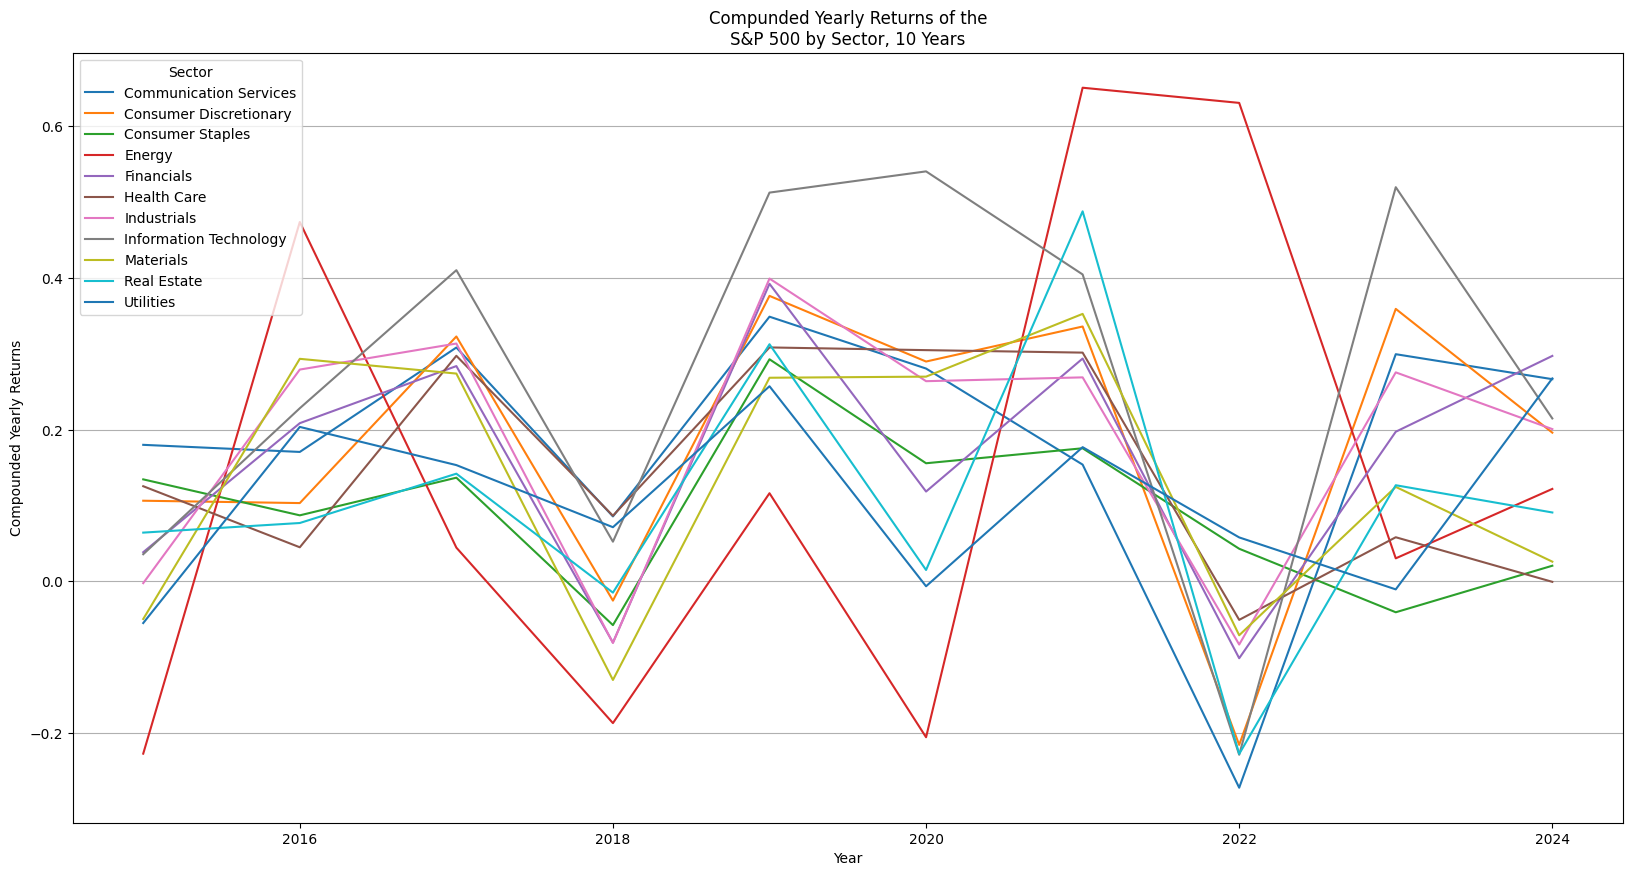

In [48]:
color_map = dict(zip(sectors, colors))
fix, ax = plt.subplots(figsize=(20, 10))

for df_part in df_partitiions:
    sector = df_part["Sector"][0]
    ax.plot(
        df_part["Year"], df_part["Compounded Return"],
        label=sector
)

ax.grid(True, axis="y")
ax.legend(title="Sector", loc='upper left')

ax.set(xlabel="Year",
        ylabel="Compounded Yearly Returns",
        title="Compunded Yearly Returns of the\nS&P 500 by Sector, 10 Years")

plt.show()

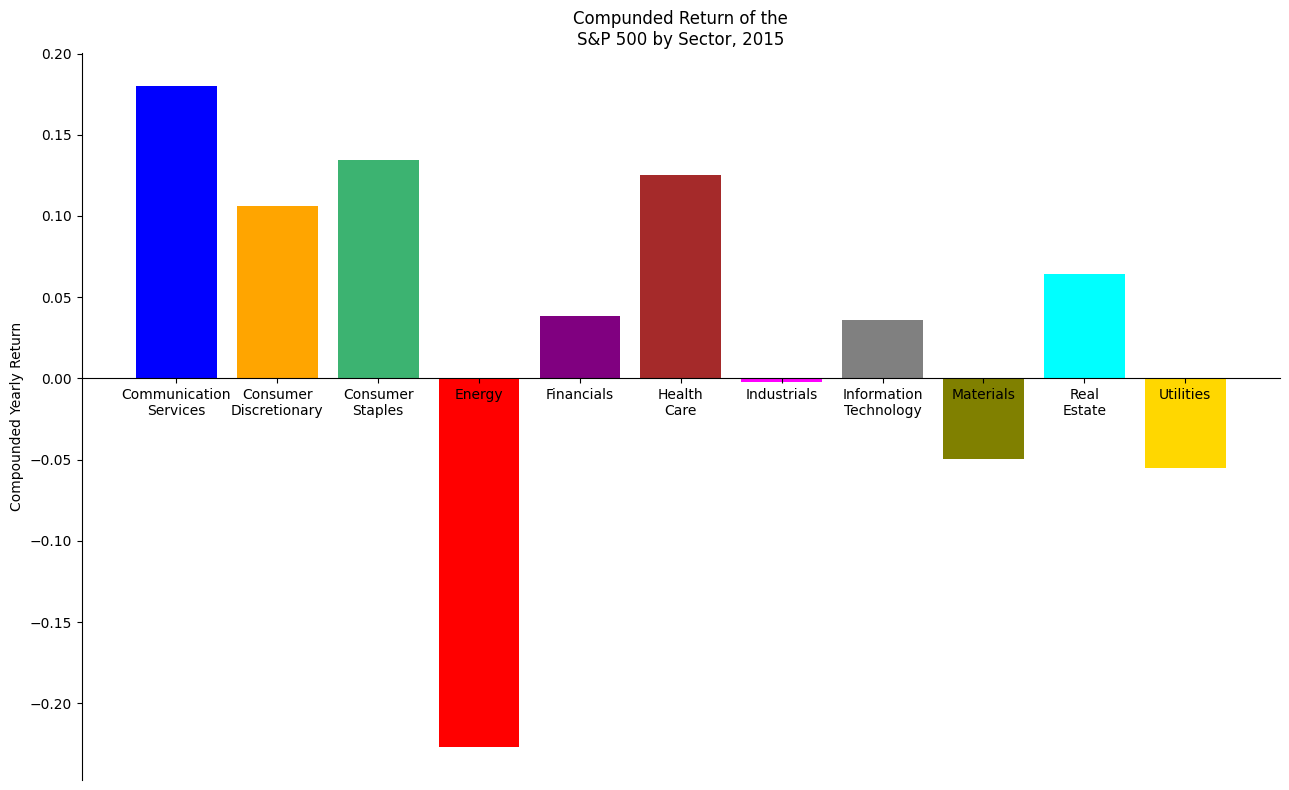

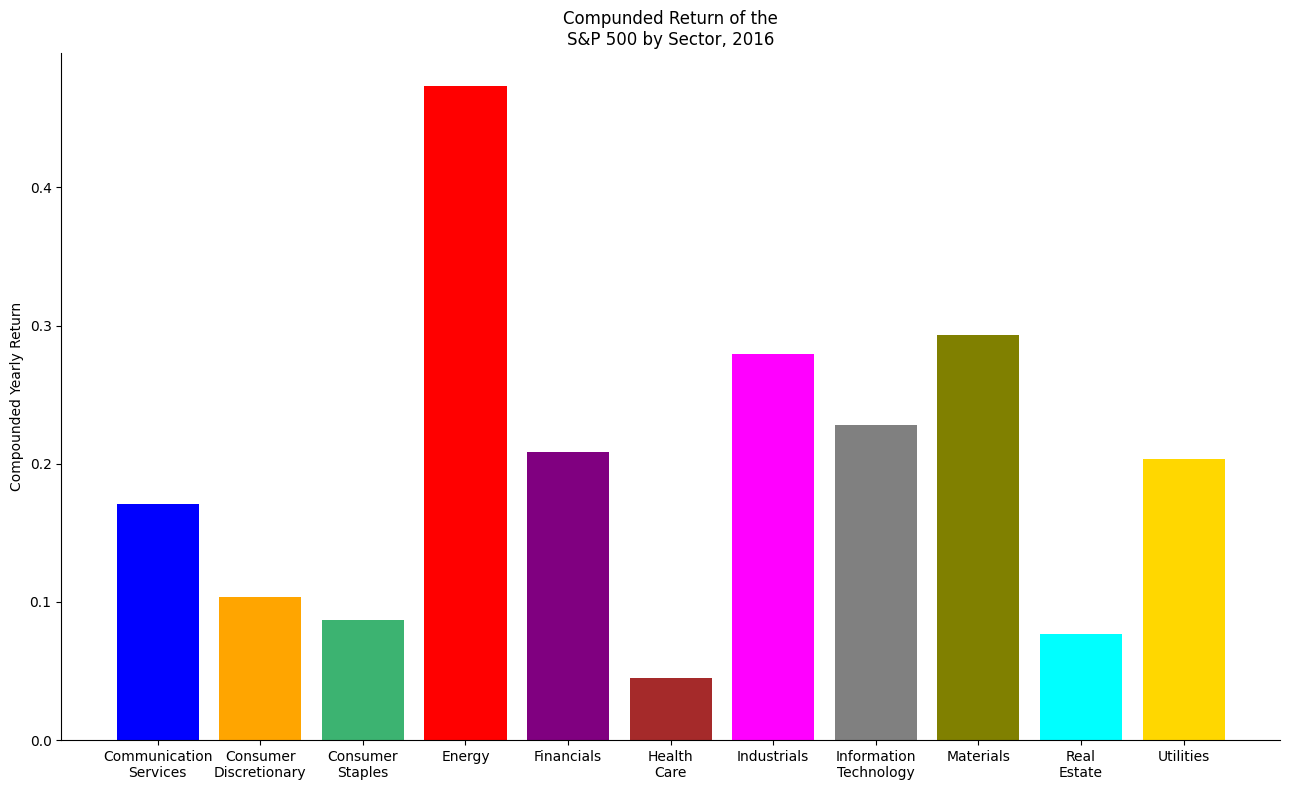

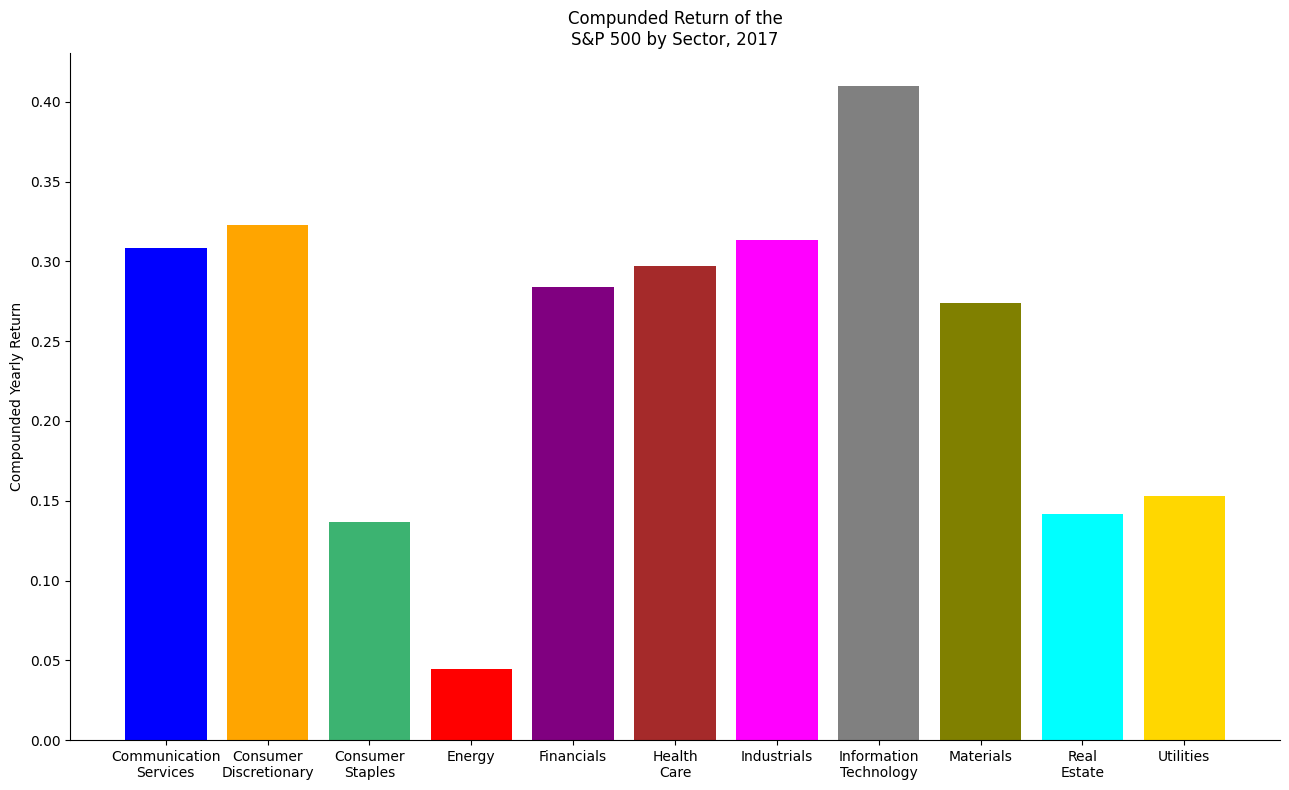

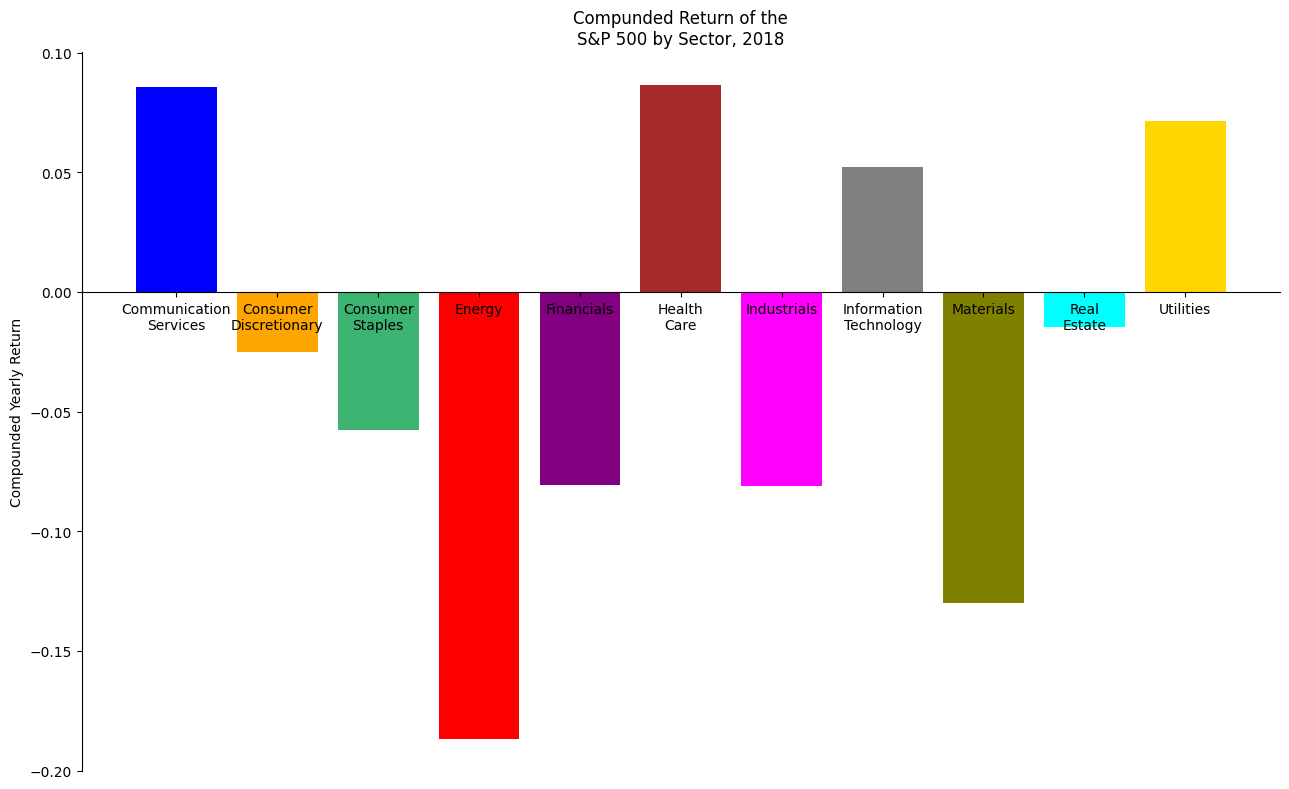

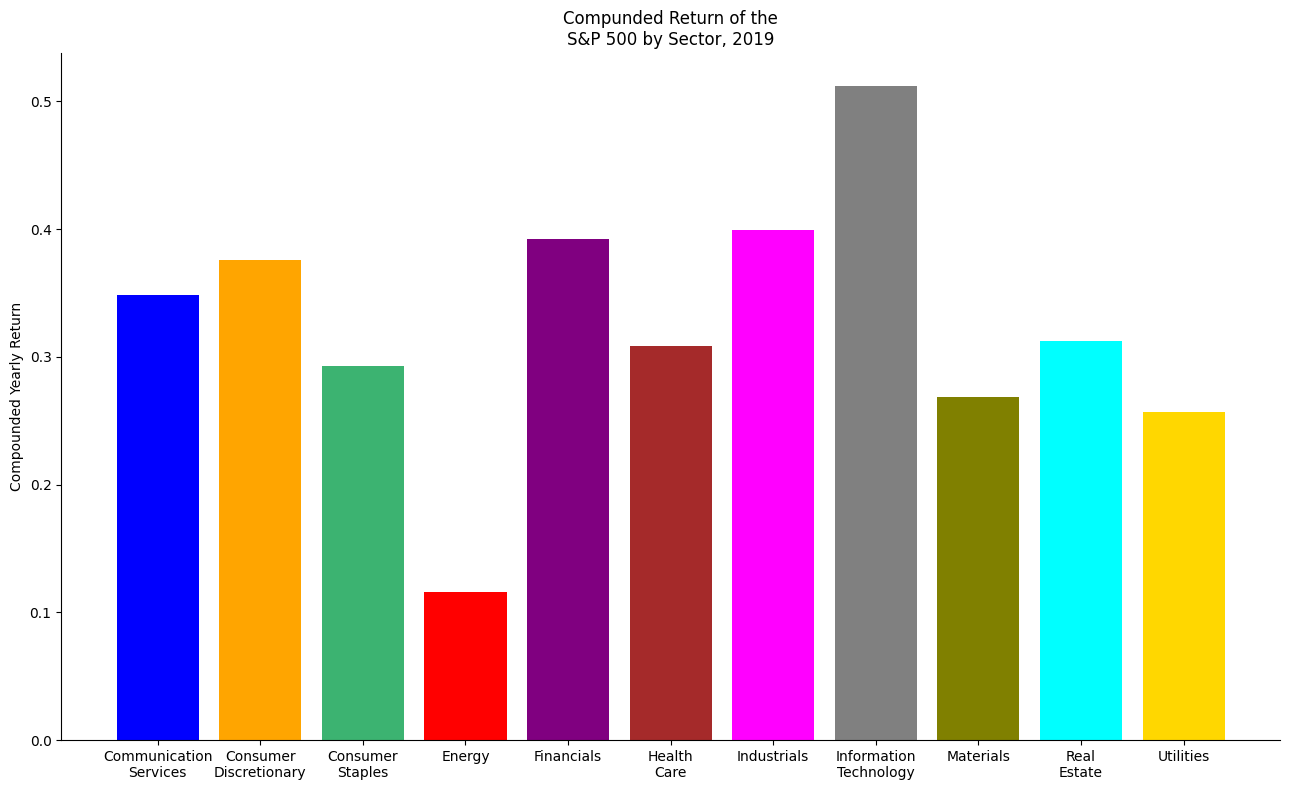

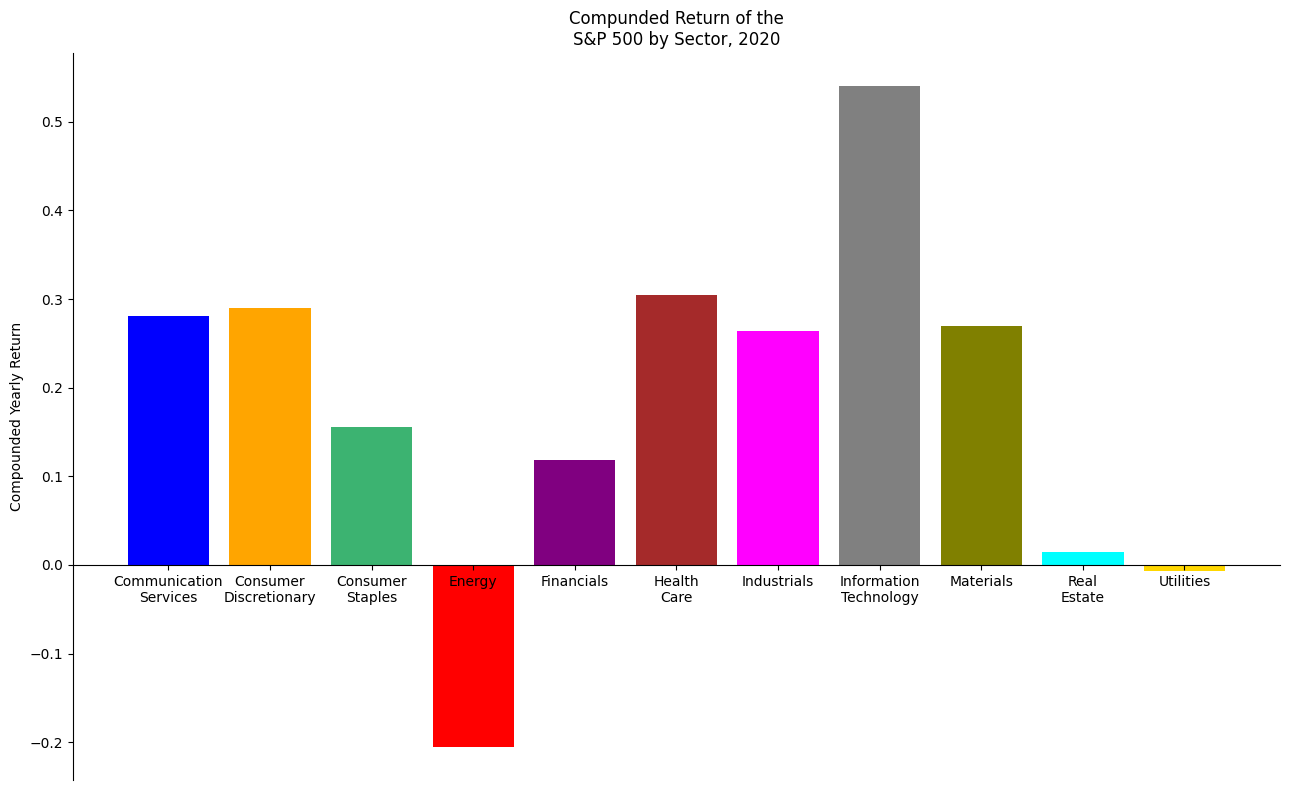

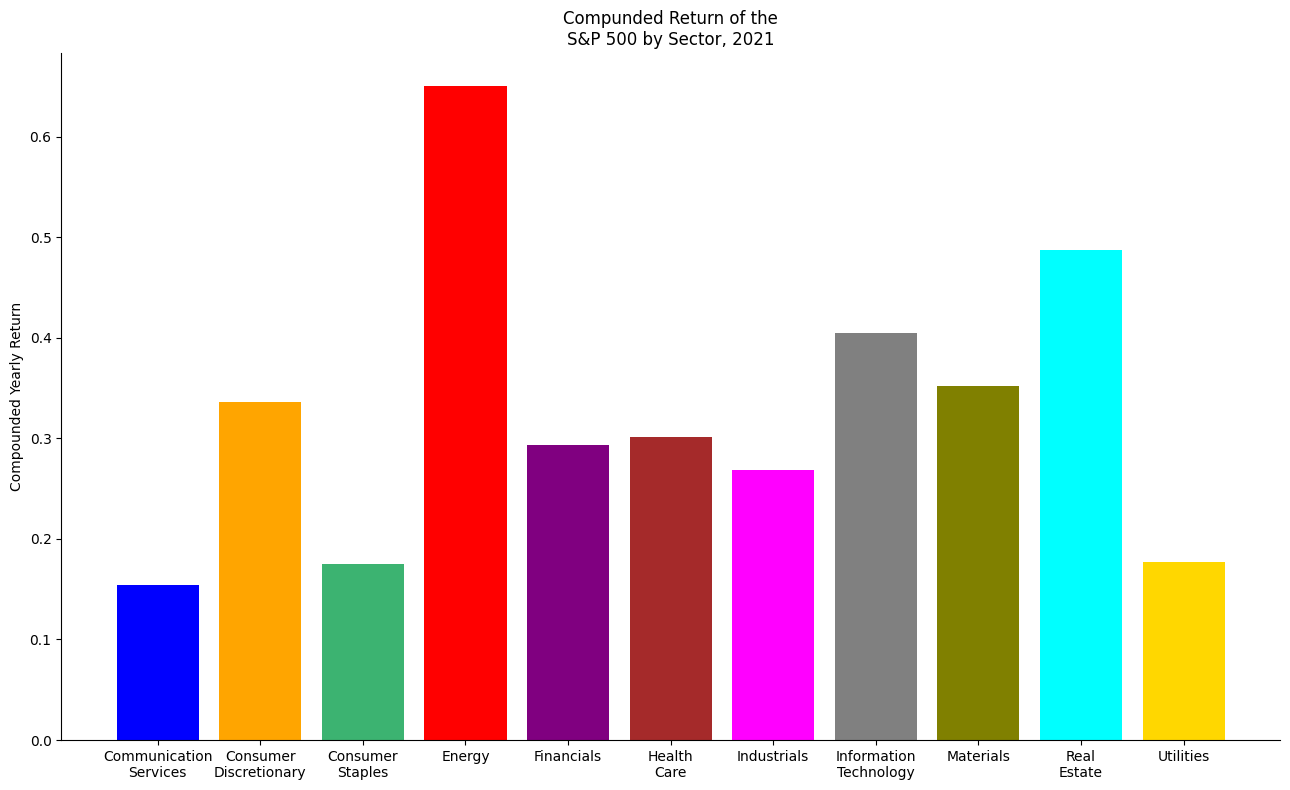

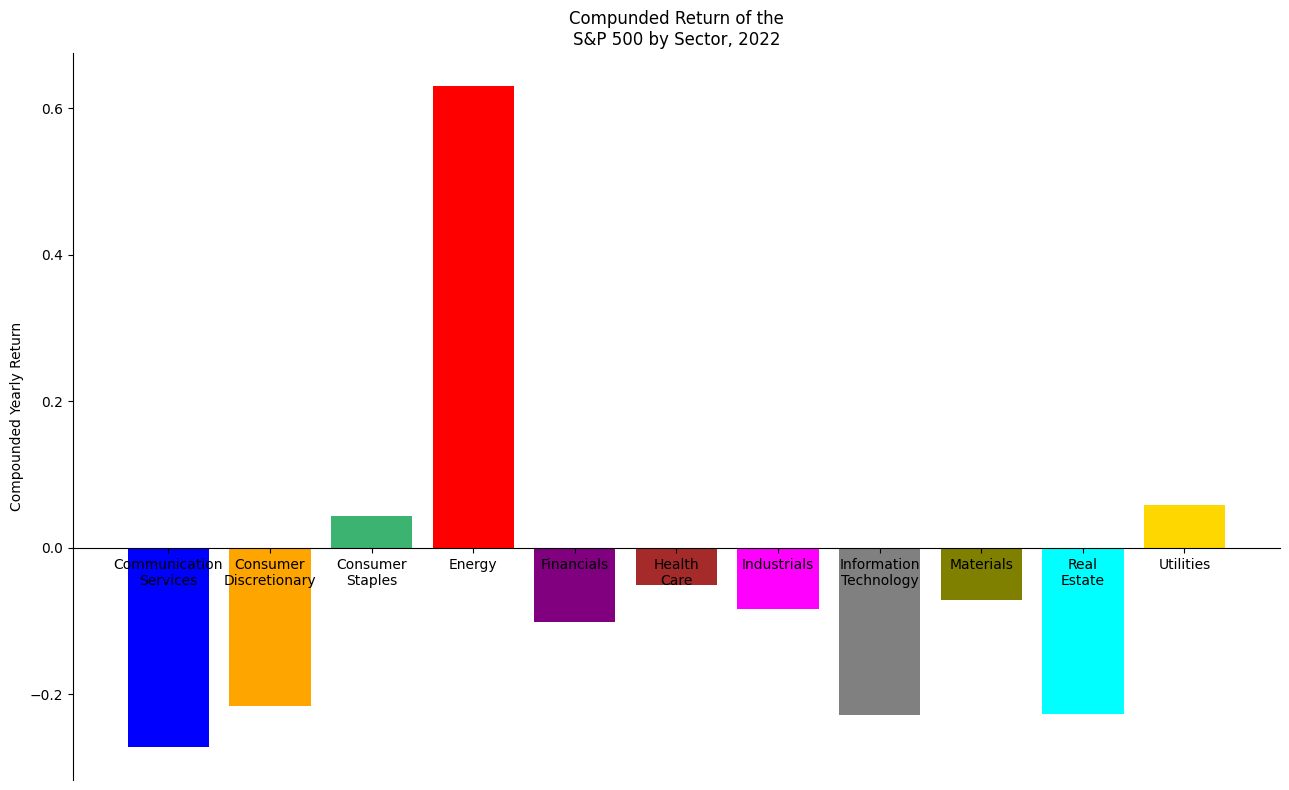

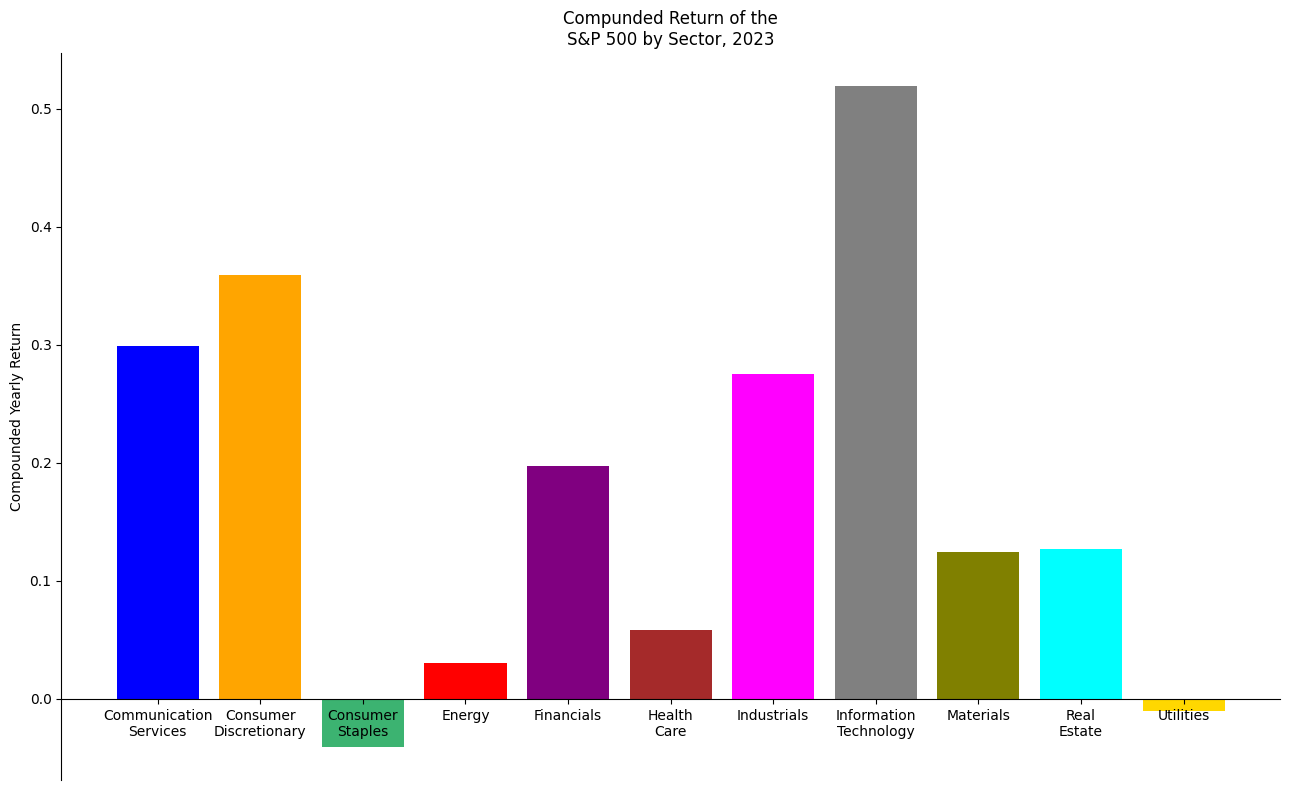

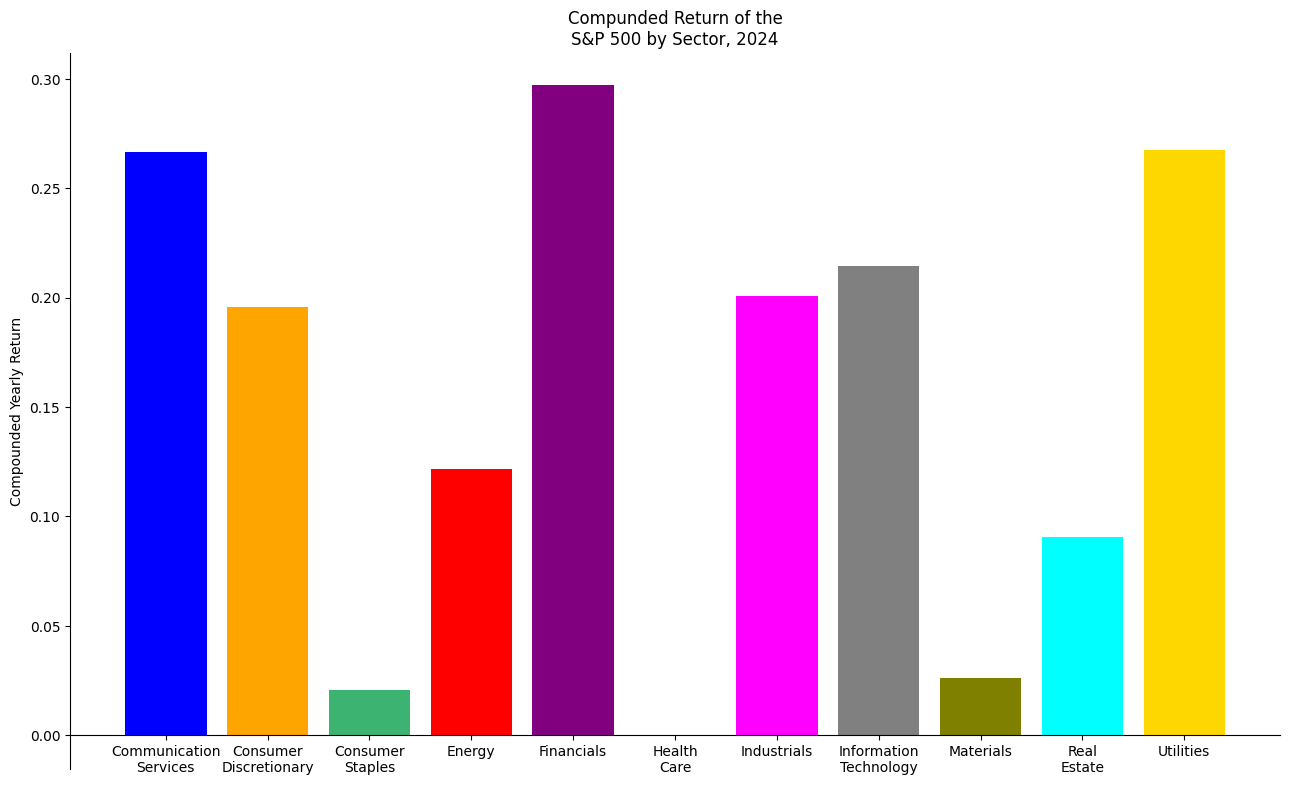

In [49]:

unique_years = df["Year"].unique().to_list()

for year in unique_years:
    df_year = df.filter(pl.col("Year") == year)

    compound = df_year["Compounded Return"]
    sector_labels = df_year["Sector"] 
    wrapped_labels = [ label.replace(' ', '\n') for label in sector_labels ] #Helps formatting

    fig, ax = plt.subplots(figsize=(13, 8))

    ax.bar(
        wrapped_labels,
        compound,
        color=colors
    )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position(('data', 0))

    ax.set(
        ylabel="Compounded Yearly Return",
        title=f"Compunded Return of the\nS&P 500 by Sector, {year}")

    plt.tight_layout()
    plt.show()



We can see how this needs to be broken up into two plots

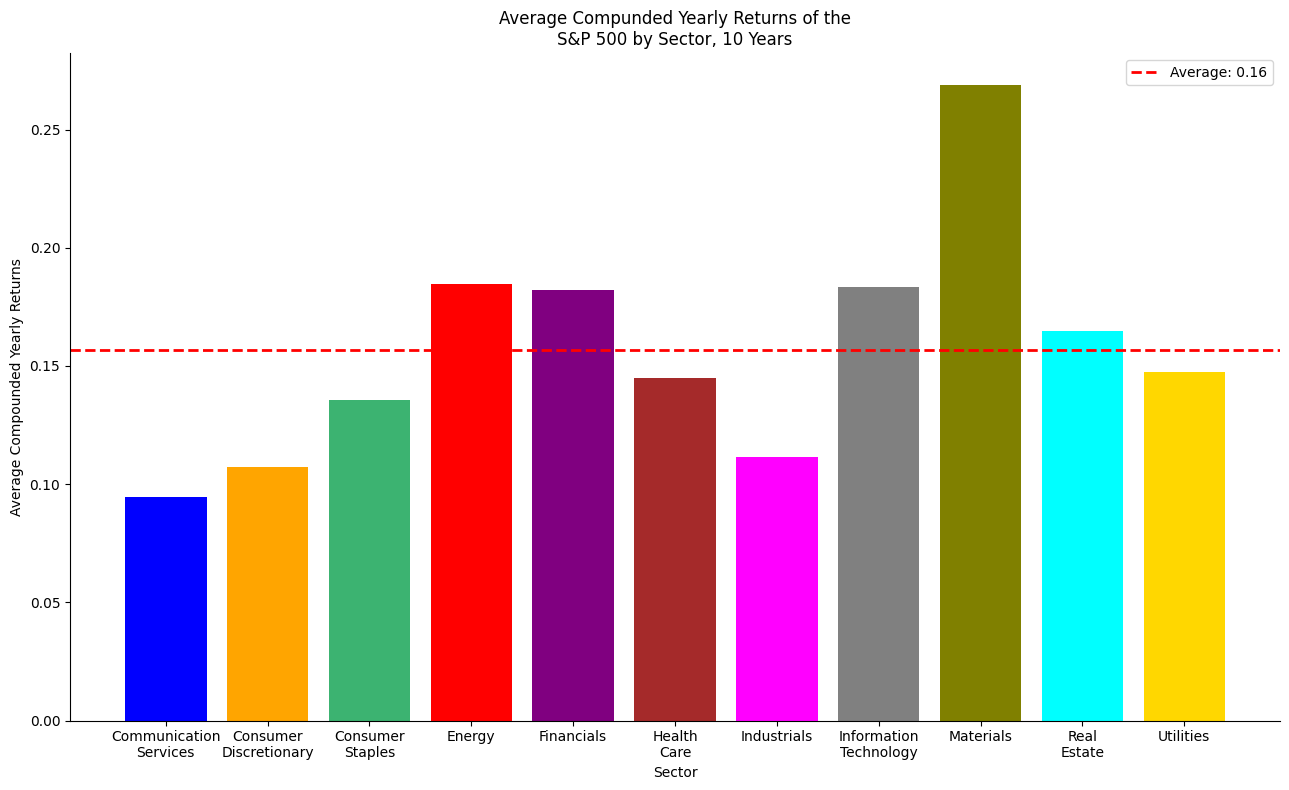

In [50]:
average_returns = (
    df.group_by(["Sector"])
    .agg(
        pl.col("Compounded Return").mean().alias("Average return")
    )
)

average_returns

fig, ax = plt.subplots(figsize=(13, 8))

ax.bar(
    wrapped_labels,
    average_returns["Average return"],
    color=colors
)

avg = average_returns["Average return"].mean()

# draw average line
ax.axhline(avg, color='red', linestyle='--', linewidth=2, label=f'Average: {avg:.2f}')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.set(xlabel="Sector",
        ylabel="Average Compounded Yearly Returns",
        title="Average Compunded Yearly Returns of the\nS&P 500 by Sector, 10 Years")

plt.tight_layout()
plt.show()

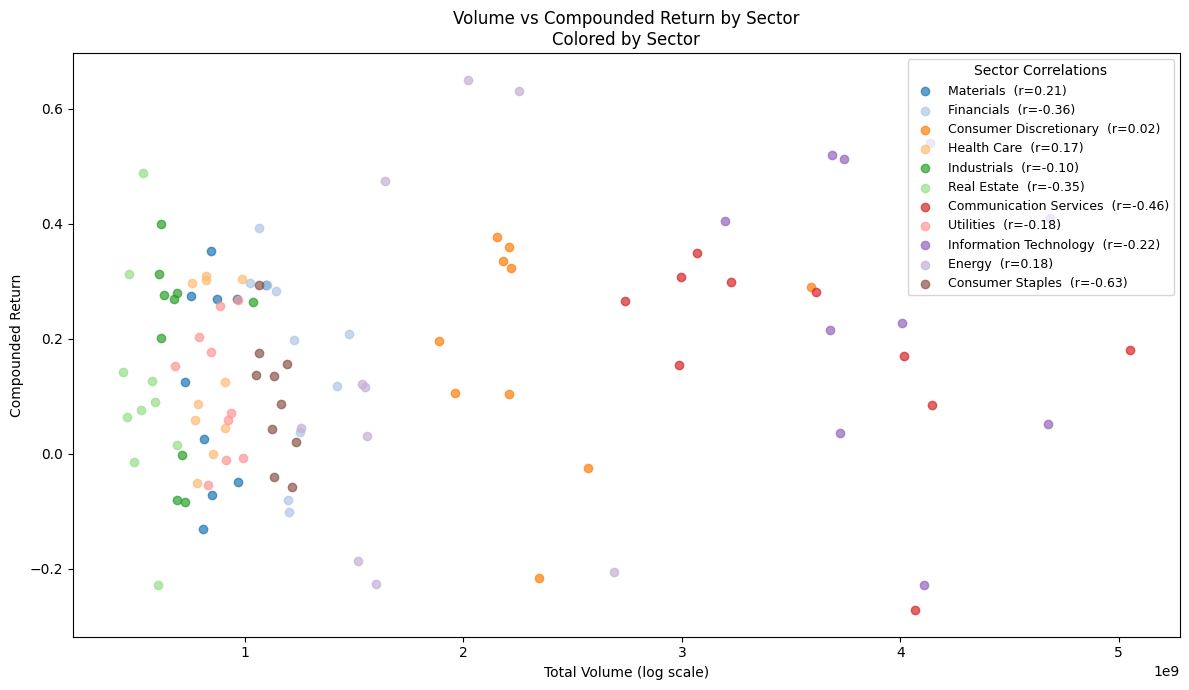

In [51]:
sectors = df["Sector"].unique().to_list()
colors = plt.cm.tab20(range(len(sectors)))  # up to 20 distinct colors

fig, ax = plt.subplots(figsize=(12, 7))

legend_labels = []

for sector, color in zip(sectors, colors):
        df_sector = df.filter(pl.col("Sector") == sector)

        x = df_sector["Total Volume"].to_numpy()
        y = df_sector["Compounded Return"].to_numpy()

        # Scatter points for this sector
        ax.scatter(x, y, color=color, alpha=0.7)

        # Compute correlation for legend
        if len(df_sector) > 1:
                corr = float(df_sector.select(
                pl.corr("Total Volume", "Compounded Return")
                ).item())
        else:
                corr = float("nan")

        legend_labels.append(f"{sector}  (r={corr:.2f})")

        ax.set_xlabel("Total Volume (log scale)")
        ax.set_ylabel("Compounded Return")
        ax.set_title("Volume vs Compounded Return by Sector\nColored by Sector")

        # Build legend
        ax.legend(
                legend_labels,
                title="Sector Correlations",
                loc="upper right",
                fontsize=9
        )

        plt.tight_layout()
plt.show()

TODO:
- Find average
- Find median
- Determine which measure is the better value to use to break up the plot

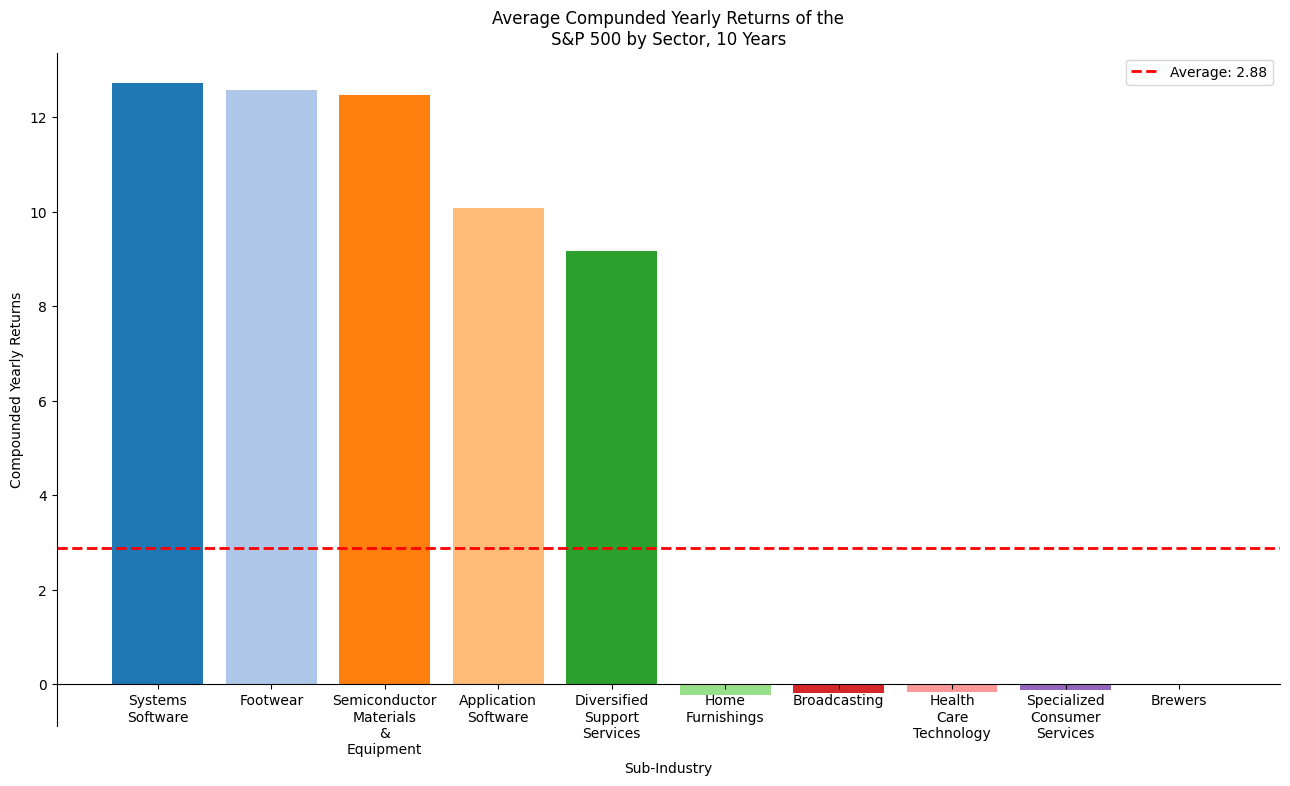

In [53]:
df_industry = (
    df_industry
    .group_by("Sub-Industry")
    .agg(
        (
            (1 + pl.col("Compounded Return")).product() - 1
        ).alias("Total Return_10yr")
    )
)



top_5 = df_industry.top_k(5, by="Total Return_10yr")
bot_5 = df_industry.bottom_k(5, by="Total Return_10yr")
top_bot_5 = pl.concat([top_5, bot_5])


fig, ax = plt.subplots(figsize=(13, 8))

wrapped_industry = [ label.replace(' ', '\n') for label in top_bot_5["Sub-Industry"] ] #Helps formatting

ax.bar(
    wrapped_industry,
    top_bot_5["Total Return_10yr"],
    color=colors
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.set(xlabel="Sub-Industry",
        ylabel="Compounded Yearly Returns",
        title="Compunded Yearly Returns of the\nS&P 500 by Sub-Industry, 10 Years")

plt.tight_layout()
plt.show()